# Imports

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Gathering and Exploring the data

In [2]:
data = load_iris()

In [12]:
#Column names:
dir(data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [13]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [97]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [22]:
final_dataset = pd.DataFrame(data=data.data,columns=data.feature_names)

In [24]:
final_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
label = data.target

In [31]:
final_dataset['Label'] = data.target 

In [37]:
final_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
Target = final_dataset['Label']
final_dataset.drop(['Label'],axis=1,inplace=True)

In [35]:
type(Target)

pandas.core.series.Series

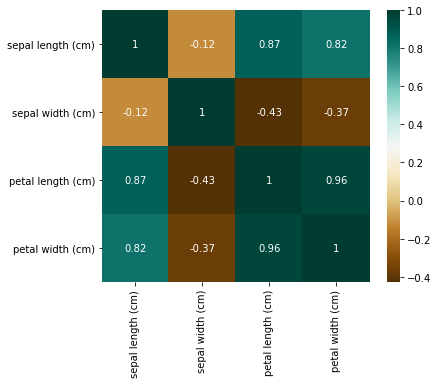

In [49]:
#Visualizing the dataset:
plt.figure(figsize=(6,5))
sns.heatmap(final_dataset.corr(),annot=True,cmap='BrBG')
plt.show()

# Train Test Split

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(final_dataset,Target,
                                                 test_size=0.3,random_state=10)

In [80]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [81]:
Prediction = model.predict(X_test)

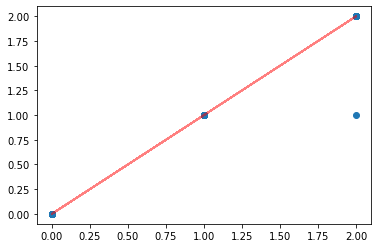

In [85]:
plt.scatter(Y_test,Prediction,)
plt.plot(Y_test,Y_test,color='red',alpha=0.5)
plt.show()

In [83]:
Prediction

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [87]:
AVG_Values = final_dataset.mean().values.reshape(1,4)

In [88]:
AVG_Values

array([[5.84333333, 3.05733333, 3.758     , 1.19933333]])

# User inputs

In [120]:
def flower_prediction(Sepal_L,Sepal_W,Petal_L,Petal_W):
    AVG_Values[0][0] =Sepal_L
    AVG_Values[0][1] =Sepal_W
    AVG_Values[0][2] =Petal_L
    AVG_Values[0][3] =Petal_W
    
    Final = data.target_names[model.predict(AVG_Values)[0]]
    
    return f"Name of the Flower is : {Final}"

In [121]:
S1 = float(input('Enter the Sepal Length:'))
S2 = float(input('Enter the Sepal Width:'))
P1 = float(input('Enter the Petal Length:'))
P2 = float(input('Enter the Petal Width:'))
flower_prediction(S1,S2,P1,P2)

Enter the Sepal Length:3.1
Enter the Sepal Width:6.7
Enter the Petal Length:3.2
Enter the Petal Width:2.1


'Name of the Flower is : versicolor'

# Check

In [101]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [102]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [115]:
temp_DS = pd.DataFrame(data=load_iris().data,columns=load_iris().feature_names)

In [117]:
temp_DS['Flower_name']= pd.Categorical.from_codes(load_iris().target,load_iris().target_names)

In [118]:
temp_DS

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
